In [5]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta

%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation

from astropy.visualization import ImageNormalize, SqrtStretch, PowerStretch, LogStretch
import sunpy.map
from sunpy.map import Map
import sunpy_soar
from sunpy.net import Fido
import sunpy.net.attrs as a

import numpy as np

#Zooming packages
from matplotlib import patches
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.data.sample

import ffmpeg

# Big plots please..
plt.rcParams["figure.figsize"] = (4, 4)
mpl.rcParams['animation.ffmpeg_path'] = r'C:\Users\samuel.wechsler\OneDrive - PMOD WRC\Documents\Short project - solar physics\ffmpeg\bin\ffmpeg.exe'

In [3]:
fp_mac = '/Users/samuelwechsler/Library/CloudStorage/OneDrive-PMODWRC/Documents/Short project - solar physics/FSI174.csv'
fp_win = r'C:\Users\samuel.wechsler\OneDrive - PMOD WRC\Documents\Short project - solar physics\FSI174.csv'

data = pd.read_csv(fp_win)
df = pd.DataFrame(data)
del df['Unnamed: 0']
df

,Date,t1,t2,x_FOV,y_FOV,xs_CEN,ys_CEN,ys_FOV,xs_FOV,I_min,I_max,Is_min,Is_max,# maps,filename,Annotation
0,13/02/2021 11:44,2021-02-13 09:44:00,2021-02-13 13:44:00,2300.0,2300.0,475.0,705.0,800.0,800.0,1,1583.0,1.0,1583.0,NaN,20210213_1144_FSI174F.mp4,NaN
1,14/02/2021 16:45,2021-02-14 14:45:00,2021-02-14 18:45:00,4800.0,4800.0,873.0,673.0,900.0,900.0,1,1650.0,1.0,1650.0,NaN,20210214_1645_FSI174F.mp4,NaN
2,14/02/2021 17:45,2021-02-14 15:45:00,2021-02-14 19:45:00,5000.0,5000.0,933.0,672.0,1200.0,1200.0,1,1717.0,1.0,1717.0,NaN,20210214_1745_FSI174F.mp4,NaN
3,15/02/2021 13:15,2021-02-15 11:15:00,2021-02-15 15:15:00,5600.0,5600.0,1114.0,694.0,1600.0,1600.0,1,1733.0,1.0,1733.0,NaN,20210215_1315_FSI174F.mp4,NaN
4,09/11/2021 16:38,2021-11-09 14:38:00,2021-11-09 18:38:00,2700.0,2700.0,1021.0,414.0,1000.0,1000.0,1,2500.0,1.0,2500.0,NaN,20211109_1638_FSI174F.mp4,NaN
5,04/12/2021 05:02,2021-12-04 03:02:00,2021-12-04 07:02:00,2400.0,2400.0,839.0,-475.0,1000.0,1000.0,1,2367.0,1.0,2367.0,NaN,20211204_0502_FSI174F.mp4,NaN
6,05/12/2021 07:14,2021-12-05 05:14:00,2021-12-05 09:14:00,3000.0,3000.0,860.0,-449.0,1000.0,1000.0,1,2410.0,1.0,2410.0,NaN,20211205_0714_FSI174F.mp4,NaN
7,01/01/2022 13:46,2022-01-01 11:46:00,2022-01-01 15:46:00,2700.0,2700.0,885.0,-202.0,800.0,1200.0,1,2967.0,1.0,2967.0,NaN,20220101_1346_FSI174F.mp4,NaN
8,13/01/2022 13:00,2022-01-13 11:00:00,2022-01-13 15:00:00,2700.0,2700.0,877.0,-449.0,900.0,900.0,1,2883.0,1.0,2883.0,NaN,20220113_1300_FSI174F.mp4,NaN
9,14/01/2022 13:14,2022-01-14 11:14:00,2022-01-14 15:14:00,2800.0,2800.0,651.0,-564.0,1200.0,1200.0,1,3000.0,1.0,3000.0,NaN,20220114_1314_FSI174F.mp4,NaN


In [8]:
def FSI174Z():
    for i in range(len(df['Date'])):
        if True in list(np.isnan(df[['x_FOV', 'y_FOV', 'xs_FOV', 'ys_FOV']].loc[i])):
            continue
            
        t1 = df['t1'][i]
        t2 = df['t2'][i]
        
        instrument = a.Instrument('EUI')
        time = a.Time(t1, t2)
        level = a.Level(2)
        product = a.soar.Product('EUI-FSI174-IMAGE')
        result = Fido.search(instrument & time & level & product)
        
        if len(result)==0:
            continue
        
        files = Fido.fetch(result)
        l = len(files) - 1

        fig = plt.figure(dpi=300)
        sample_map = Map(files[0]).rotate(Map(files[0]).meta['crota'] * u.deg)
        ax = fig.add_subplot(projection=Map(files[0]))
        ax.axis('off')
        plot_obj = Map(files[0]).plot(axes=ax)
       
        length = 0.5 * df['xs_FOV'][i] * u.arcsec
        x0 = df['xs_CEN'][i] * u.arcsec
        y0 = df['ys_CEN'][i] * u.arcsec
        
        def animate(y):
            print(f'{y} of {len(files)}')
            m_eui = Map(files[l-y])
            bottom_left = SkyCoord(x0 - length, y0 - length, frame=m_eui.coordinate_frame)
            top_right = SkyCoord(x0 + length, y0 + length, frame=m_eui.coordinate_frame)
            submap = m_eui.submap(bottom_left, top_right=top_right)
            m_eui = m_eui.submap(bottom_left, top_right=top_right)
            m_eui = m_eui.rotate(m_eui.meta['crota'] * u.deg)
            m_eui.plot_settings['norm'] = ImageNormalize(vmin=1, vmax=df['I_max'][i], stretch=LogStretch(1000))
            ax.set_title(f"FSI 174 {m_eui.meta['date-obs']}")
            plot_obj.set_data(m_eui.data)
            return (plot_obj,)
        
        b = df['Date'][i]
        filename = b[:4]+b[5:7]+b[8:10]+'_'+b[11:13]+b[14:16]+'_FSI174Z.mp4'
        f = "C:\\Users\\samuel.wechsler\\OneDrive - PMOD WRC\\Documents\\Short project - solar physics\\FSI174Z_nc\\" + filename
        anim = animation.FuncAnimation(fig, animate, frames=len(files))
        plt.colorbar()
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=3)
        anim.save(f, writer=writer)


    

In [9]:
def FSI174F():
    for i in range(len(df['Date'])):
        if True in list(np.isnan(df[['x_FOV', 'y_FOV', 'xs_FOV', 'ys_FOV']].loc[i])):
            continue
        
        t1 = df['t1'][i]
        t2 = df['t2'][i]
        
        instrument = a.Instrument('EUI')
        time = a.Time(t1, t2)
        level = a.Level(2)
        product = a.soar.Product('EUI-FSI174-IMAGE')
        result = Fido.search(instrument & time & level & product)
        
        if len(result)==0:
            continue
        
        files = Fido.fetch(result)

        l = len(files) - 1
        
        fig = plt.figure(dpi=300)
        sample_map = Map(files[0]).rotate(Map(files[0]).meta['crota'] * u.deg)
        ax = fig.add_subplot(projection=Map(files[0]))
        ax.axis('off')
        plot_obj = Map(files[0]).plot(axes=ax)
        
        
        length = 0.5 * df['x_FOV'][i] * u.arcsec
        x0 = 0 * u.arcsec
        y0 = 0 * u.arcsec
        
        def animate(y):
            print(f'{y} of {len(files)}')
            m_eui = Map(files[l-y])
            bottom_left = SkyCoord(x0 - length, y0 - length, frame=m_eui.coordinate_frame)
            top_right = SkyCoord(x0 + length, y0 + length, frame=m_eui.coordinate_frame)
            m_eui = m_eui.submap(bottom_left, top_right=top_right)
            m_eui = m_eui.rotate(m_eui.meta['crota'] * u.deg)
            m_eui.plot_settings['norm'] = ImageNormalize(vmin=1, vmax=df['I_max'][i], stretch=LogStretch(1000))
            ax.set_title(f"FSI 174 {m_eui.meta['date-obs']}")
            plot_obj.set_data(m_eui.data)
            return (plot_obj,)
        

        filename = df['filename'][i]
        f = "C:\\Users\\samuel.wechsler\\OneDrive - PMOD WRC\\Documents\\Short project - solar physics\\FSI174F_nc\\" + filename
        anim = animation.FuncAnimation(fig, animate, frames=len(files))
        plt.colorbar()
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=3)
        anim.save(f, writer=writer)


    

Files Downloaded:   0%|          | 0/8 [00:00<?, ?file/s]

<IPython.core.display.Javascript object>


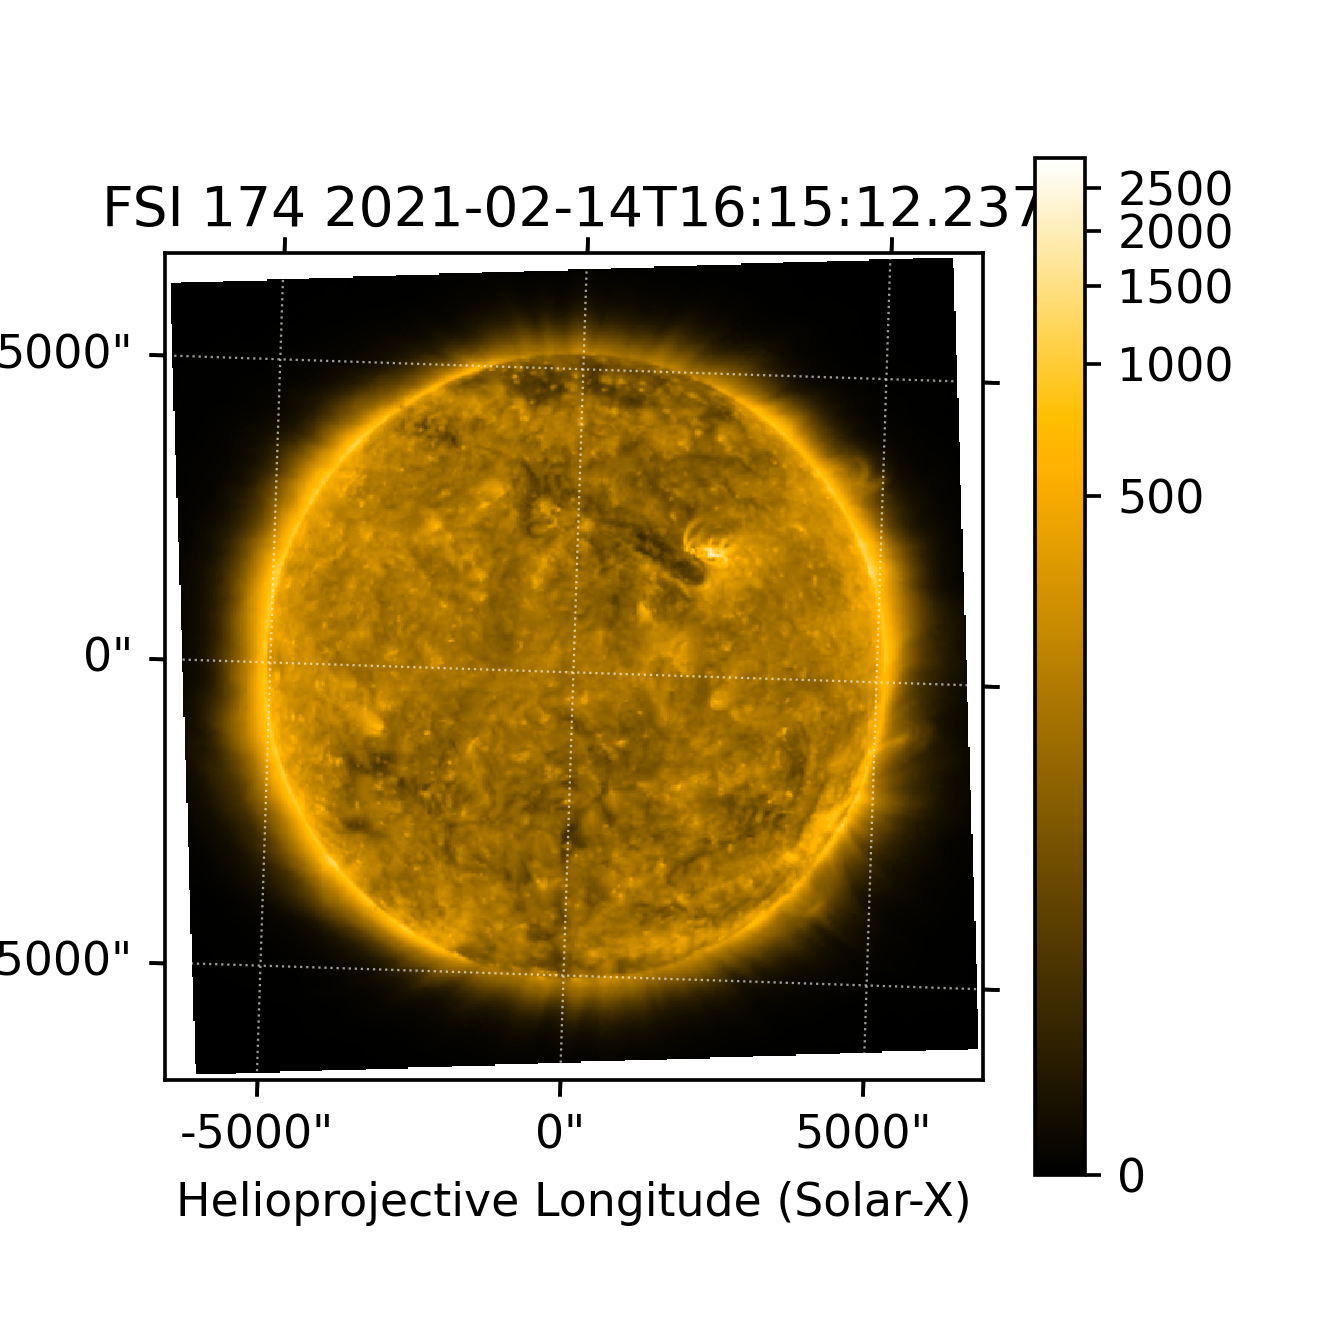

0 of 8
0 of 8
1 of 8
2 of 8
3 of 8
4 of 8
5 of 8
6 of 8
7 of 8


In [7]:
i = 1

t1 = df['t1'][i]
t2 = df['t2'][i]
        
instrument = a.Instrument('EUI')
time = a.Time(t1, t2)
level = a.Level(2)
product = a.soar.Product('EUI-FSI174-IMAGE')
result = Fido.search(instrument & time & level & product)
        
files = Fido.fetch(result)

l = len(files) - 1
        
fig = plt.figure(dpi=300)
sample_map = Map(files[0]).rotate(Map(files[0]).meta['crota'] * u.deg)
ax = fig.add_subplot(projection=Map(files[0]))
plot_obj = Map(files[0]).plot(axes=ax)
        
        
length = 0.5 * df['x_FOV'][i] * u.arcsec
x0 = 0 * u.arcsec
y0 = 0 * u.arcsec
        
def animate(y):
    print(f'{y} of {len(files)}')
    m_eui = Map(files[l-y])
    bottom_left = SkyCoord(x0 - length, y0 - length, frame=m_eui.coordinate_frame)
    top_right = SkyCoord(x0 + length, y0 + length, frame=m_eui.coordinate_frame)
    m_eui = m_eui.submap(bottom_left, top_right=top_right)
    m_eui = m_eui.rotate(m_eui.meta['crota'] * u.deg)
    m_eui.plot_settings['norm'] = ImageNormalize(vmin=1, vmax=df['I_max'][i], stretch=LogStretch(1000))
    ax.set_title(f"FSI 174 {m_eui.meta['date-obs']}")
    plot_obj.set_data(m_eui.data)
    return (plot_obj,)
        

filename = df['filename'][i]
f = "C:\\Users\\samuel.wechsler\\OneDrive - PMOD WRC\\Desktop\\" + filename
anim = animation.FuncAnimation(fig, animate, frames=len(files))
plt.colorbar()
Writer = animation.writers['ffmpeg']
writer = Writer(fps=3)
anim.save(f, writer=writer)

In [8]:
Map(files[0]).dsun

<Distance 7.45249689e+10 m>

# single errors

In [15]:
df.loc[5]

Date                2021-12-04 05:02:00
t1                  2021-12-04 03:02:00
t2                  2021-12-04 07:02:00
x_FOV                            2400.0
y_FOV                            2400.0
xs_CEN                            839.0
ys_CEN                           -475.0
ys_FOV                           1000.0
xs_FOV                           1000.0
I_min                                 1
I_max                            2367.0
Is_min                                1
Is_max                           2367.0
# maps                              NaN
filename      20211204_0502_FSI174F.mp4
Annotation                          NaN
Name: 5, dtype: object

In [16]:
i = 5
t1 = df['t1'][i]
t2 = df['t2'][i]
        
instrument = a.Instrument('EUI')
time = a.Time(t1, t2)
level = a.Level(2)
product = a.soar.Product('EUI-FSI174-IMAGE')
result = Fido.search(instrument & time & level & product)

        
files = Fido.fetch(result)

Files Downloaded:   0%|          | 0/120 [00:00<?, ?file/s]

2 of 120


<IPython.core.display.Javascript object>


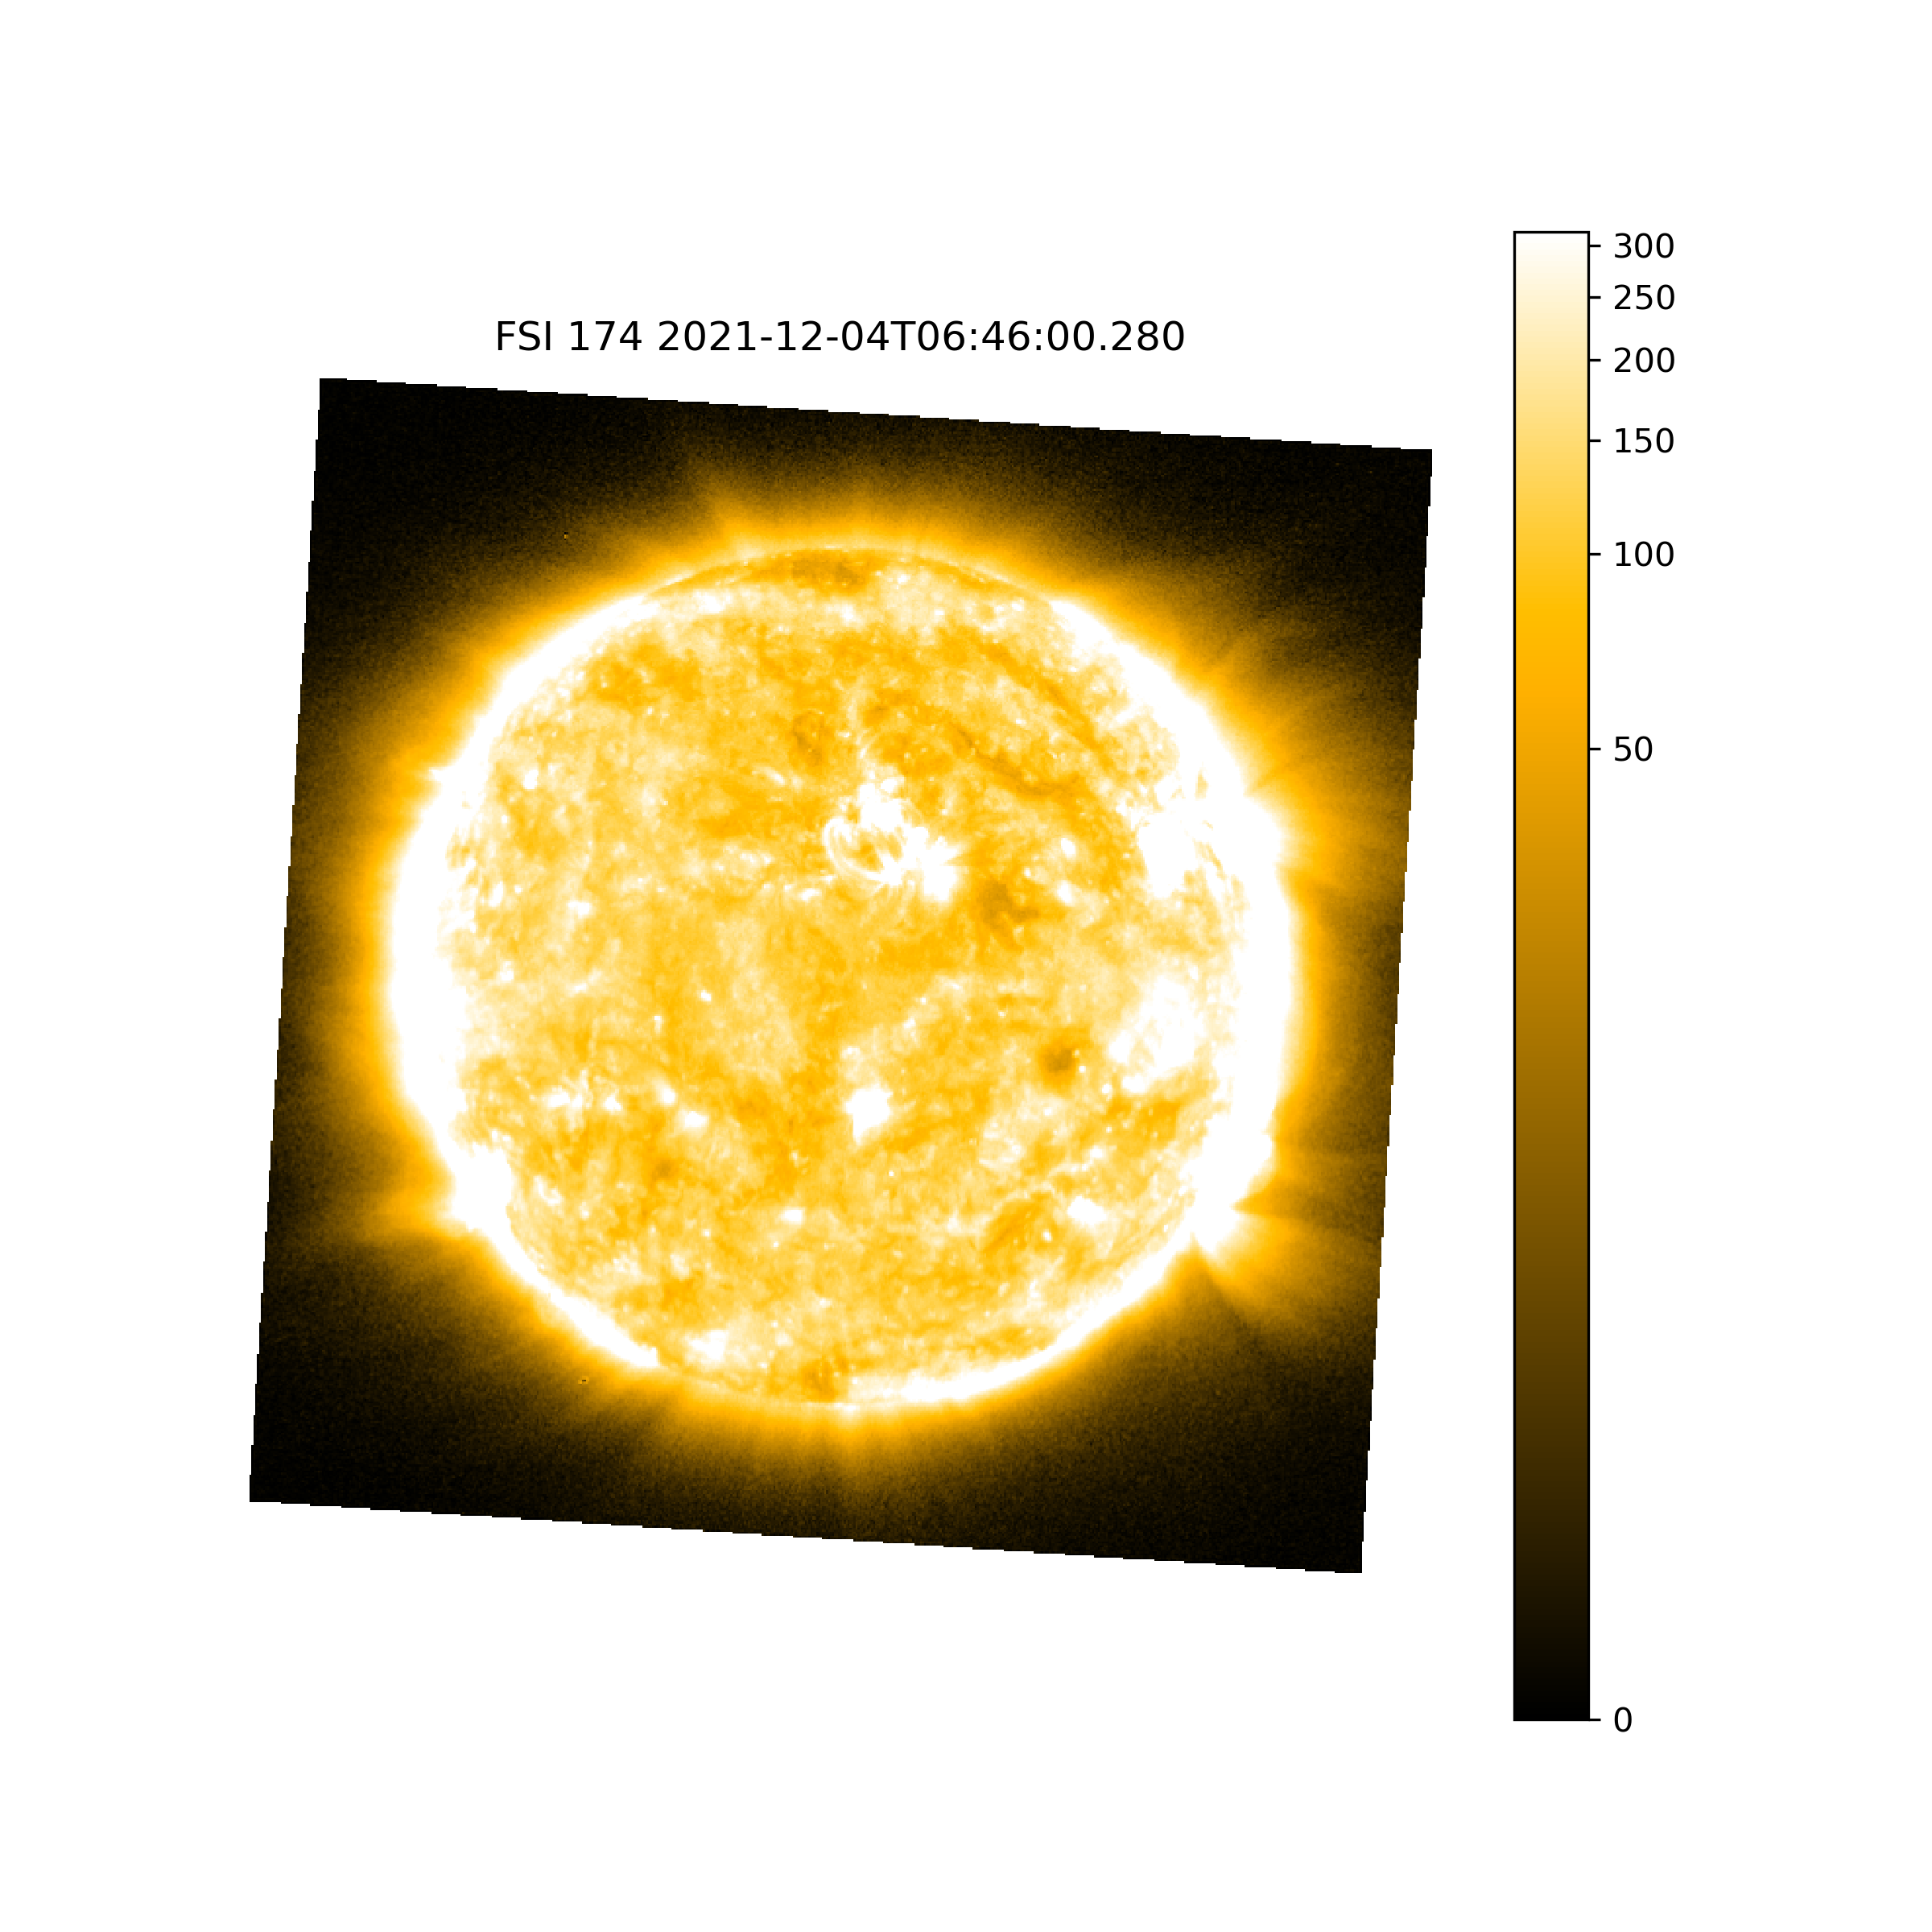

0 of 120
0 of 120
1 of 120
2 of 120
3 of 120
4 of 120
5 of 120
6 of 120
7 of 120
8 of 120
9 of 120
10 of 120
11 of 120
12 of 120
13 of 120
14 of 120
15 of 120
16 of 120
17 of 120
18 of 120
19 of 120
20 of 120
21 of 120
22 of 120
23 of 120
24 of 120
25 of 120
26 of 120
27 of 120
28 of 120
29 of 120
30 of 120
31 of 120
32 of 120
33 of 120
34 of 120
35 of 120
36 of 120
37 of 120
38 of 120
39 of 120
40 of 120
41 of 120
42 of 120
43 of 120
44 of 120
45 of 120
46 of 120
47 of 120
48 of 120
49 of 120
50 of 120
51 of 120
52 of 120
53 of 120
54 of 120
55 of 120
56 of 120
57 of 120
58 of 120
59 of 120
60 of 120
61 of 120
62 of 120
63 of 120
64 of 120
65 of 120
66 of 120
67 of 120
68 of 120
69 of 120
70 of 120
71 of 120
72 of 120
73 of 120
74 of 120
75 of 120
76 of 120
77 of 120
78 of 120
79 of 120
80 of 120
81 of 120
82 of 120
83 of 120
84 of 120
85 of 120
86 of 120
87 of 120
88 of 120
89 of 120
90 of 120
91 of 120
92 of 120
93 of 120
94 of 120
95 of 120
96 of 120
97 of 120
98 of 120
99 of 120
1

In [19]:

l = len(files) - 1
        
fig = plt.figure(dpi=300)
sample_map = Map(files[0]).rotate(Map(files[0]).meta['crota'] * u.deg)
ax = fig.add_subplot(projection=Map(files[0]))
ax.axis('off')
plot_obj = Map(files[0]).plot(axes=ax)
        
        
length = 0.5 * df['x_FOV'][i] * u.arcsec
x0 = 0 * u.arcsec
y0 = 0 * u.arcsec
        
def animate(y):
    print(f'{y} of {len(files)}')
    m_eui = Map(files[l-y])
    bottom_left = SkyCoord(x0 - length, y0 - length, frame=m_eui.coordinate_frame)
    top_right = SkyCoord(x0 + length, y0 + length, frame=m_eui.coordinate_frame)
    m_eui = m_eui.submap(bottom_left, top_right=top_right)
    m_eui = m_eui.rotate(m_eui.meta['crota'] * u.deg)
    m_eui.plot_settings['norm'] = ImageNormalize(vmin=1, vmax=4000, stretch=LogStretch(1000))
    ax.set_title(f"FSI 174 {m_eui.meta['date-obs']}")
    plot_obj.set_data(m_eui.data)
    return (plot_obj,)
        

filename = df['filename'][i]
f = "C:\\Users\\samuel.wechsler\\OneDrive - PMOD WRC\\Documents\\Short project - solar physics\\FSI174F_nc\\" + filename
anim = animation.FuncAnimation(fig, animate, frames=len(files))
plt.colorbar()
Writer = animation.writers['ffmpeg']
writer = Writer(fps=3)
anim.save(f, writer=writer)